In [2]:
import pandas as pd
import transformers as trans

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
ordinal_columns = ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

In [4]:
df_train = pd.read_csv('data/train-student-mat.csv')

X_train = df_train[ordinal_columns]
y_train = df_train['Final_Score']

df_test = pd.read_csv('data/test-student-mat.csv')
X_test = df_test[ordinal_columns]
y_test = df_test['Final_Score']

In [5]:
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [6]:
df_importance = pd.DataFrame(zip(X_train.columns, regressor.feature_importances_),
                             columns=['feature', 'importance'
                                      ]).sort_values('importance', ascending=False)

[Text(0, 0, '0.28'),
 Text(0, 0, '0.26'),
 Text(0, 0, '0.25'),
 Text(0, 0, '0.16'),
 Text(0, 0, '0.04'),
 Text(0, 0, '0.00')]

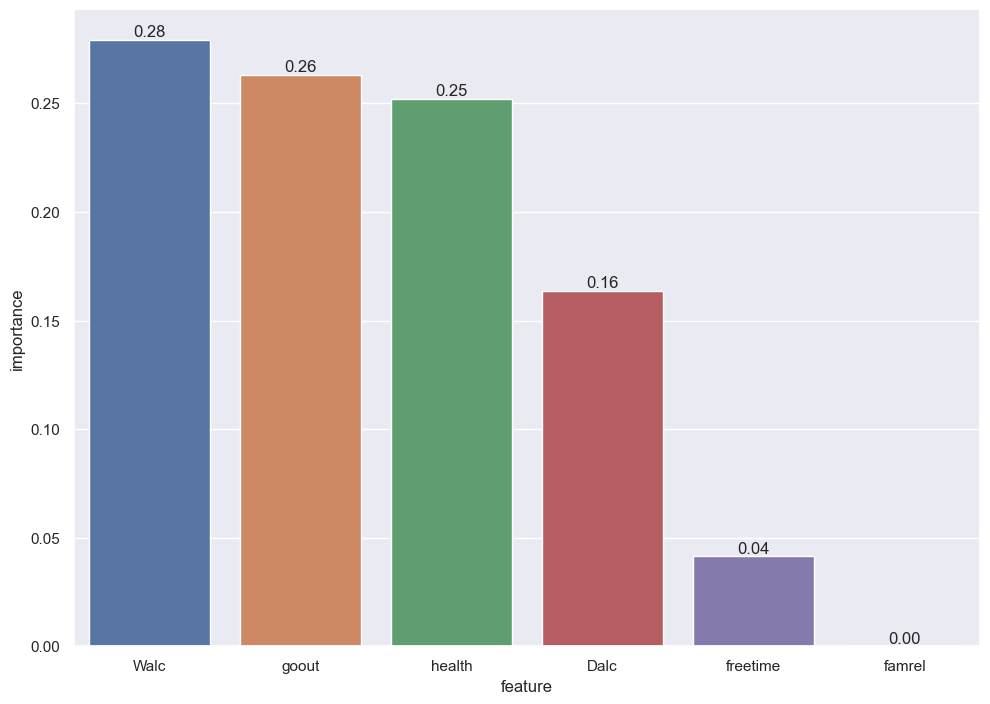

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='feature', y='importance', data=df_importance)
ax.bar_label(ax.containers[0], fmt='%.2f')

In [8]:
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

4.002797902638225

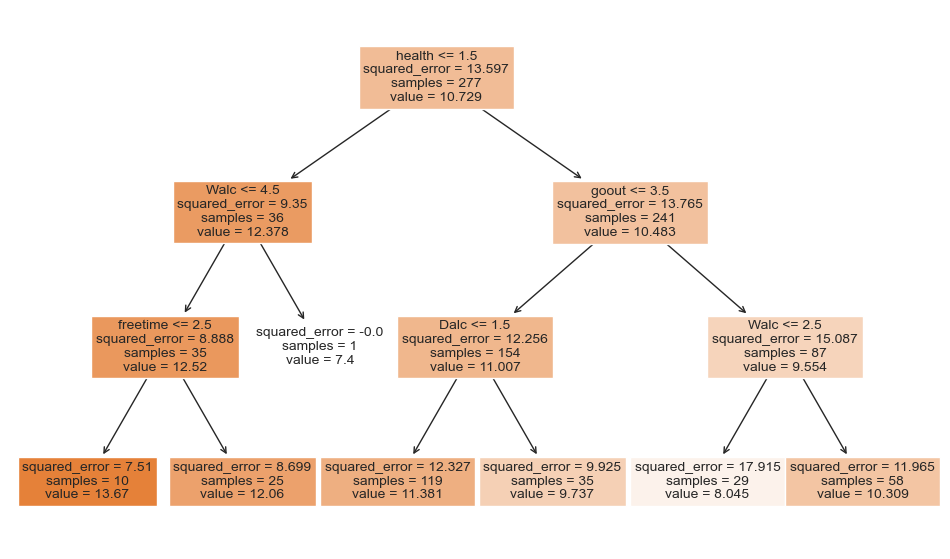

In [9]:
fig = plt.figure(figsize=(12,7))
_ = tree.plot_tree(regressor, 
                   feature_names=list(X_train.columns),  
                   filled=True)

## Encode 'health'

In [10]:
X_train.freetime.value_counts()

freetime
3    110
4     78
2     43
5     32
1     14
Name: count, dtype: int64

In [ ]:
## recode health based on the size of the subclass
## most samples in class 3 -> new code of class: 1
## class 4 -> new code of class: 2
## class 2 -> new code of class: 3
## class 5 -> new code of class: 4
## class 1 -> new code of class: 5

In [11]:
new_dic = {
    3: 1,
    4: 2,
    2: 3,
    5: 4,
    1: 5
}

In [12]:
X_train.freetime = X_train.freetime.map(new_dic)
X_test.freetime = X_test.freetime.map(new_dic)

C:\Users\Me\AppData\Local\Temp\ipykernel_15392\4027898102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.freetime = X_train.freetime.map(new_dic)
C:\Users\Me\AppData\Local\Temp\ipykernel_15392\4027898102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.freetime = X_test.freetime.map(new_dic)


In [13]:
X_train.freetime.value_counts()

freetime
1    110
2     78
3     43
4     32
5     14
Name: count, dtype: int64

In [14]:
regressor_new = DecisionTreeRegressor(max_depth=3)
regressor_new.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [15]:
df_importance = pd.DataFrame(zip(X_train.columns, regressor_new.feature_importances_),
                             columns=['feature', 'importance'
                                      ]).sort_values('importance', ascending=False)

[Text(0, 0, '0.38'),
 Text(0, 0, '0.23'),
 Text(0, 0, '0.21'),
 Text(0, 0, '0.18'),
 Text(0, 0, '0.00'),
 Text(0, 0, '0.00')]

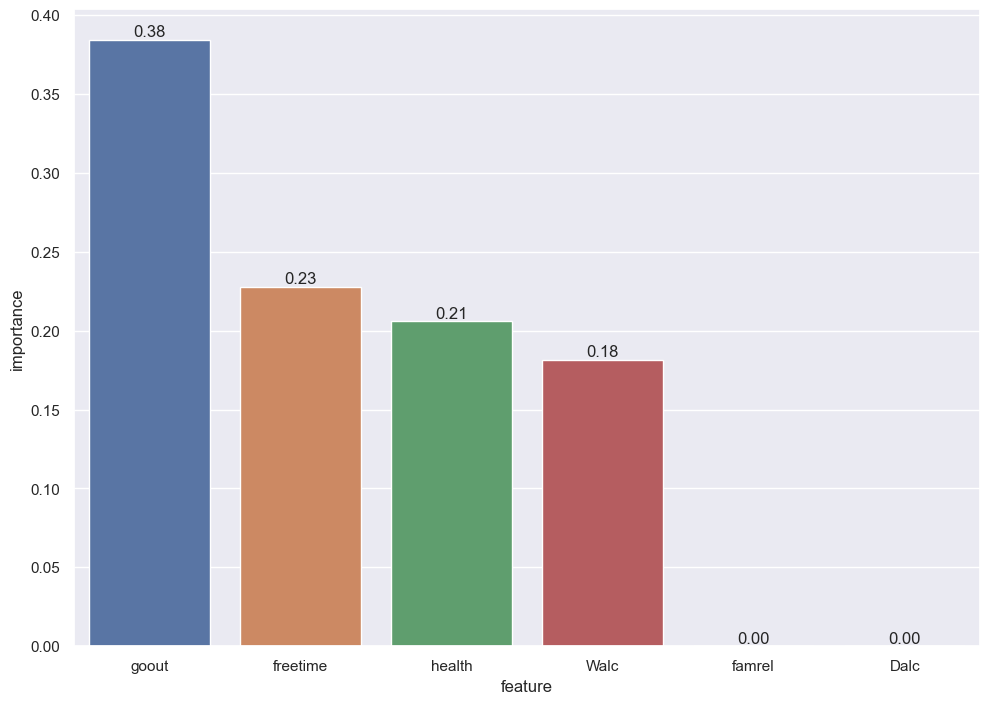

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='feature', y='importance', data=df_importance)
ax.bar_label(ax.containers[0], fmt='%.2f')

In [17]:
y_pred = regressor_new.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

4.044707828698765

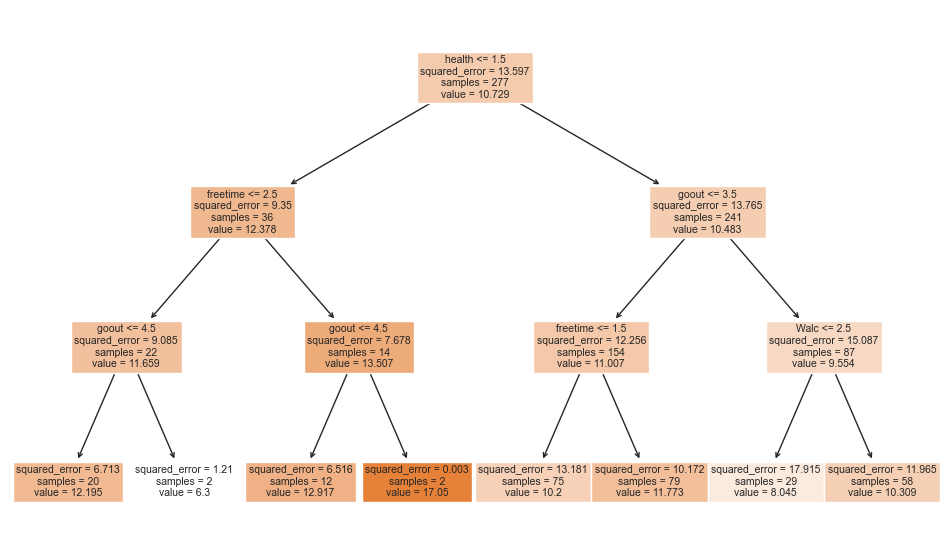

In [18]:
fig = plt.figure(figsize=(12,7))
_ = tree.plot_tree(regressor_new, 
                   feature_names=list(X_train.columns),  
                   filled=True)